# Machine Learning Workflow

Today, we will be exploring the fundamental steps in the model building process. Before diving in machine learning algorithms we must learn the steps necessary for ensuring the algorithms we train will not suffer from data corruption problems (GiGo!) or overfitting. 

In [15]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
url = 'https://raw.githubusercontent.com/pedroteche-ih/DAFT_MEX_202209/main/data/tb_hotel_traintest.csv'
tb_hotel = pd.read_csv(url)

In [12]:
tb_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113409 entries, 0 to 113408
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           113409 non-null  object 
 1   is_cancelled                    113409 non-null  int64  
 2   lead_time                       113409 non-null  int64  
 3   stays_in_weekend_nights         113409 non-null  int64  
 4   stays_in_week_nights            113409 non-null  int64  
 5   adults                          113409 non-null  int64  
 6   children                        113406 non-null  float64
 7   babies                          113409 non-null  int64  
 8   meal                            113409 non-null  object 
 9   country                         112951 non-null  object 
 10  market_segment                  113409 non-null  object 
 11  distribution_channel            113409 non-null  object 
 12  is_repeated_gues

In [13]:
tb_hotel.isna().sum()

hotel                                  0
is_cancelled                           0
lead_time                              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               3
babies                                 0
meal                                   0
country                              458
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              15491
company                           106972
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_par

In [14]:
tb_hotel.describe()

,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,id_booking
count,113409.000000,113409.000000,113409.000000,113409.000000,113409.000000,113406.000000,113409.000000,113409.000000,113409.000000,113409.000000,113409.000000,97918.000000,6437.000000,113409.000000,113409.000000,113409.000000,113409.000000,113409.000000
mean,0.370658,104.109074,0.927907,2.500498,1.857304,0.104227,0.007980,0.031673,0.087101,0.136330,0.220917,86.459476,189.195122,2.326200,101.882431,0.062367,0.571612,59714.795969
std,0.482983,106.894825,0.998723,1.906670,0.583753,0.398976,0.098027,0.175129,0.844538,1.497662,0.649771,110.559811,131.579937,17.613897,50.626711,0.245190,0.792979,34464.577528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.400000,0.000000,0.000000,29879.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.900000,0.000000,0.000000,59708.000000
75%,1.000000,161.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,89584.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,119389.000000


## Outlier Removal

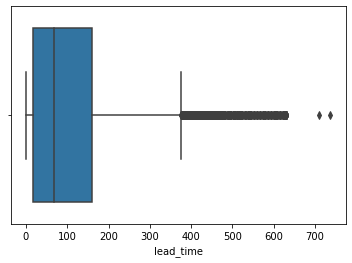

In [16]:
sns.boxplot(data = tb_hotel, x = 'lead_time')

### Mean & Std. Dev.

Mean - 1 Std. Dev. < 68% < Mean + 1 Std. Dev.

Mean - 2 Std. Dev. < 95% < Mean + 2 Std. Dev.

Mean - 3 Std. Dev. < 99% < Mean + 3 Std. Dev.


In [17]:
tb_hotel['lead_time'].mean()

104.10907423573084

In [19]:
tb_hotel['lead_time'].std()

106.89482537726188

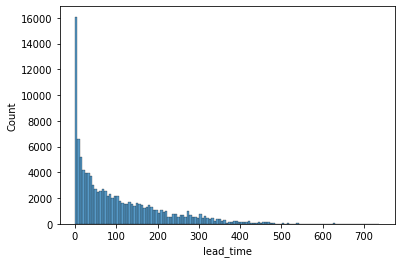

In [21]:
sns.histplot(data = tb_hotel, x = 'lead_time')

In [24]:
mu = tb_hotel['lead_time'].mean()
sd = tb_hotel['lead_time'].std()
(tb_hotel['lead_time'] < (mu - 3*sd)) | (tb_hotel['lead_time'] > (mu + 3*sd))

0         False
1          True
2         False
3         False
4         False
          ...  
113404    False
113405    False
113406    False
113407    False
113408    False
Name: lead_time, Length: 113409, dtype: bool

In [25]:
mask = (tb_hotel['lead_time'] < (mu - 3*sd)) | (tb_hotel['lead_time'] > (mu + 3*sd))
tb_hotel['3_sigma_outlier'] = mask

In [29]:
False + True + True

2

In [27]:
tb_hotel['3_sigma_outlier'].sum()

1390

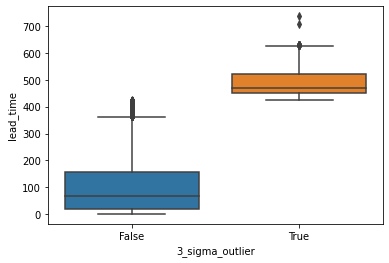

In [32]:
sns.boxplot(data = tb_hotel, y = 'lead_time', x = '3_sigma_outlier')

### Chebyshev Inequality

mu - 3 * sig < 88% < mu + 3 * sig

mu - 5 * sig < 96% < mu + 5 * sig

In [33]:
mask = (tb_hotel['lead_time'] < (mu - 5*sd)) | (tb_hotel['lead_time'] > (mu + 5*sd))
tb_hotel['cheby_outlier'] = mask

In [35]:
tb_hotel['cheby_outlier'].sum()

2

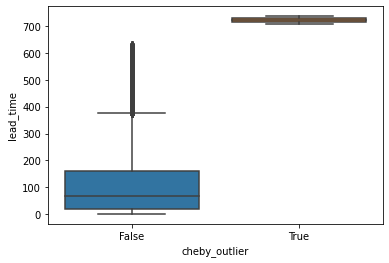

In [34]:
sns.boxplot(data = tb_hotel, y = 'lead_time', x = 'cheby_outlier')

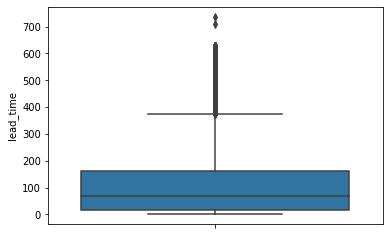

In [36]:
sns.boxplot(data = tb_hotel, y = 'lead_time')

### IQR Range

q1 - 3 * IQR < Good Data < q3 + 3 * IQR

In [38]:
q25 = np.quantile(tb_hotel['lead_time'], 0.25)
q75 = np.quantile(tb_hotel['lead_time'], 0.75)

In [39]:
IQR = q75 - q25
print(IQR)

143.0


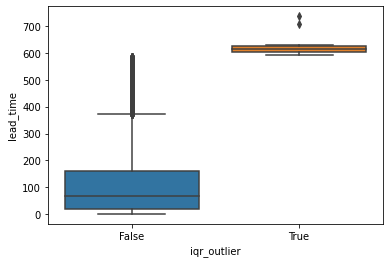

In [40]:
mask = (tb_hotel['lead_time'] > (q75 + 3 * IQR)) | (tb_hotel['lead_time'] < (q25 - 3 * IQR))
tb_hotel['iqr_outlier'] = mask
sns.boxplot(data = tb_hotel, y = 'lead_time', x = 'iqr_outlier')

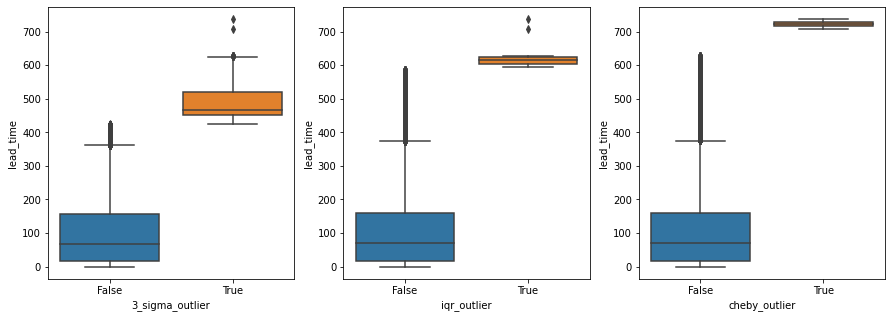

In [46]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

sns.boxplot(data = tb_hotel, y = 'lead_time', x = '3_sigma_outlier', ax = ax[0])
sns.boxplot(data = tb_hotel, y = 'lead_time', x = 'cheby_outlier', ax = ax[2])
sns.boxplot(data = tb_hotel, y = 'lead_time', x = 'iqr_outlier', ax = ax[1])

## Treating NAs

In [60]:
from sklearn.impute import SimpleImputer


In [47]:
tb_hotel.isna().sum()

hotel                                  0
is_cancelled                           0
lead_time                              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               3
babies                                 0
meal                                   0
country                              458
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              15491
company                           106972
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_par

In [52]:
tb_hotel['is_company'] = np.where(tb_hotel['company'].isna(), 0, 1)

In [53]:
tb_hotel['is_company'].describe()

count    113409.000000
mean          0.056759
std           0.231383
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_company, dtype: float64

In [54]:
tb_hotel['is_agent'] = np.where(tb_hotel['agent'].isna(), 0, 1)

In [55]:
tb_hotel = tb_hotel.drop(['company', 'agent'], axis = 1)

In [57]:
tb_hotel = tb_hotel.dropna( subset = ['country'], axis = 0)

In [58]:
tb_hotel.isna().sum()

hotel                             0
is_cancelled                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          3
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
arrival_date                      0
id_booking                        0
3_sigma_outlier             

In [59]:
tb_hotel['children'].describe()

count    112948.000000
mean          0.104544
std           0.399580
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [62]:
children_imputer = SimpleImputer(strategy = 'median')
children_imputer.fit(tb_hotel[['children']])

SimpleImputer()

In [65]:
children_imputer.transform(tb_hotel[['children']])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [66]:
tb_hotel['children'] = tb_hotel['children'].fillna(0)

In [67]:
tb_hotel.isna().sum()

hotel                             0
is_cancelled                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
arrival_date                      0
id_booking                        0
3_sigma_outlier             

## Scaling

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [84]:
tb_hotel['std_lead_time'] = (tb_hotel['lead_time'] - tb_hotel['lead_time'].mean())/tb_hotel['lead_time'].std()
tb_hotel['std_adults'] = (tb_hotel['adults'] - tb_hotel['adults'].mean())/tb_hotel['adults'].std()
tb_hotel['std_adr'] = (tb_hotel['adr'] - tb_hotel['adr'].mean())/tb_hotel['adr'].std()

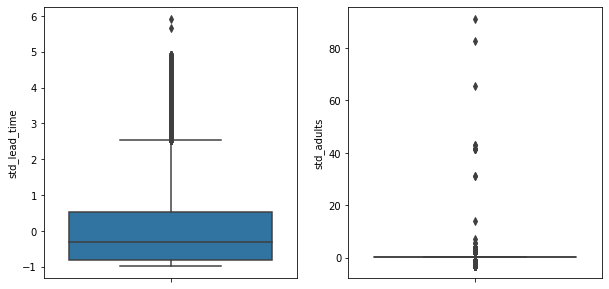

In [92]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = tb_hotel, y = 'std_lead_time', ax= ax[0])
sns.boxplot(data = tb_hotel, y = 'std_adults', ax= ax[1])

In [95]:
lt_std_scaler = StandardScaler()
tb_hotel['std_lead_time'] = lt_std_scaler.fit_transform(tb_hotel[['lead_time']])

In [96]:
lt_rob_scaler = RobustScaler()
tb_hotel['rob_lead_time'] = lt_rob_scaler.fit_transform(tb_hotel[['lead_time']])

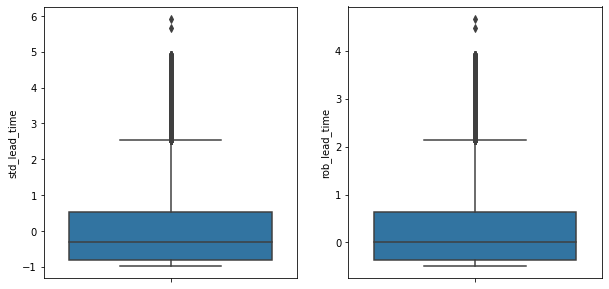

In [97]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(data = tb_hotel, y = 'std_lead_time', ax= ax[0])
sns.boxplot(data = tb_hotel, y = 'rob_lead_time', ax= ax[1])

## Categorical Encoding

In [98]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Train/Test Sampling

In [ ]:
from sklearn.model_selection import train_test_split